# Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/WKCJUp7noHAKALNP9 (Submit your .ipynb file)

In [3]:
# mount data from google drive to colab
# from google.colab import drive
# drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy
import matplotlib.pyplot as plt
import time
import ipywidgets as widgets
import seaborn as sns
from imblearn.pipeline import Pipeline as imbPipeline
from feature_engine import outliers


# Loại bỏ warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [4]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    normalize_data = pd.read_csv(path)
    display(normalize_data.head())
    display(normalize_data.describe())
    return normalize_data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


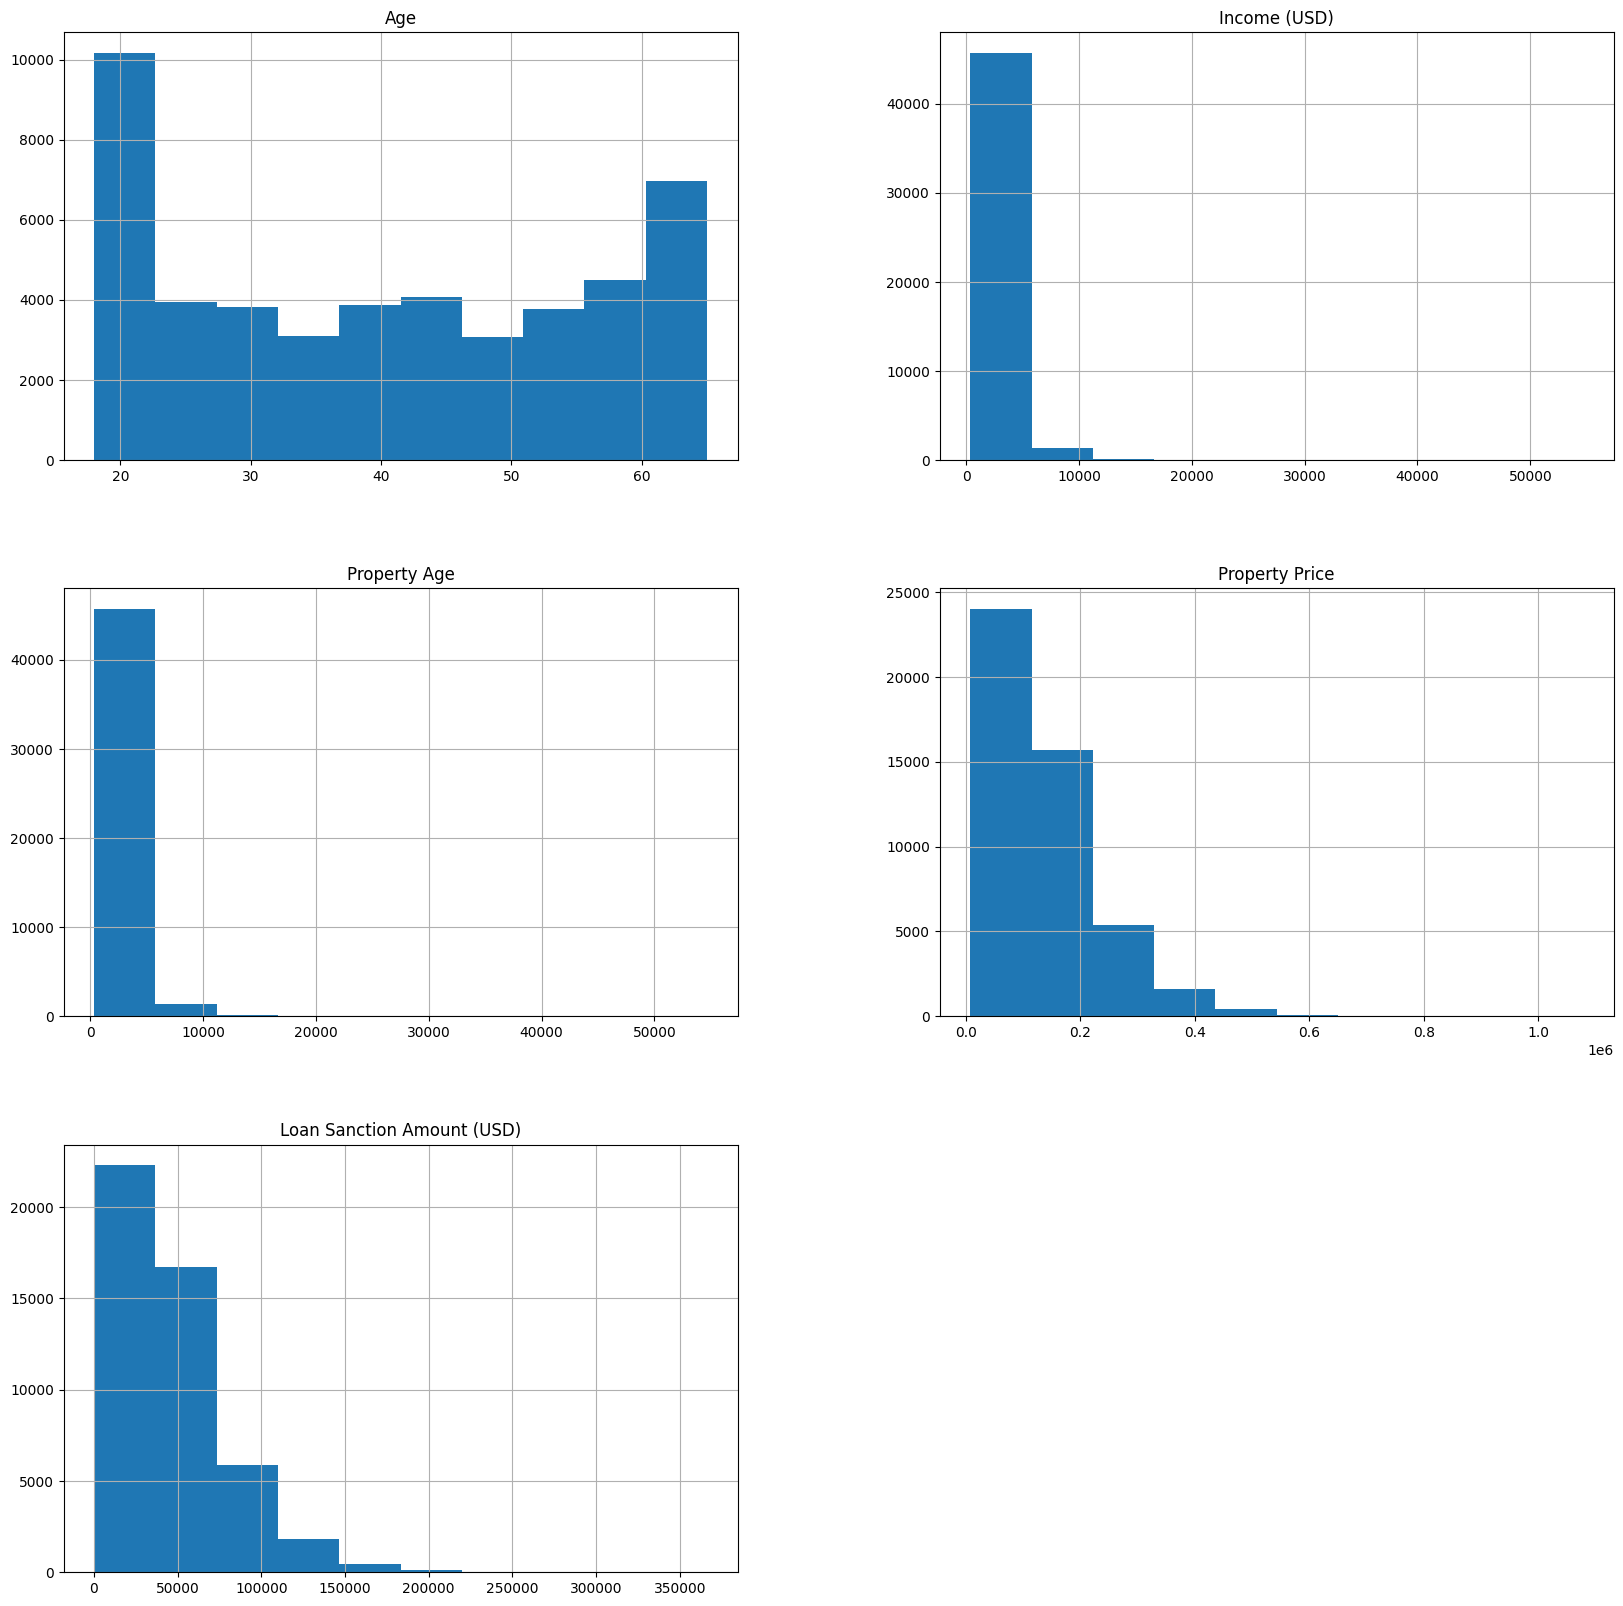

In [5]:
import os
os.chdir('/home/kisejin/Documents/MATH/Machine Learning/CODE/Tuan01')


PATH = "final_house_loan.csv" # Path to your file

df = read_dataset(PATH)
#ToDo: Show histogram of dataframe
df.hist(figsize=(20,20))
plt.show()

## Data Analysis

In [6]:
# Data analysis
# Todo: analyze your data here

### Kiểm tra giá trị null ở các đặc trưng

In [7]:
# Check null in dataframe
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

**Nhận xét**:
* Income, Income Stability, Property Age và Property Location có giá trị null
* Việc loại bỏ các giá trị này ở bước feature engineering không làm dữ liệu thiếu quá nhiều

### Loại dữ liệu cho từng đặc trưng

In [8]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB


**Nhận xét**:
* Đối với 3 đặc trưng dạng object sẽ được transform thành categorical để train model

### Các giá trị xuất hiện trong các đặc trưng dạng object

In [9]:
# Check value in object features
display(df['Gender'].unique())
display(df['Property Location'].unique())
display(df['Income Stability'].unique())

array(['F', 'M'], dtype=object)

array(['Rural', 'Urban', 'Semi-Urban', nan], dtype=object)

array(['Low', 'High', nan], dtype=object)

## Preprocessing

In [10]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    df = df.dropna()
    return df

In [11]:
df = preprocessing_data(df.copy())
print('Shape of dataframe: ', df.shape)

Shape of dataframe:  (47251, 8)


**Nhận xét**:
* Sau khi loại bỏ các giá trị null, dữ liệu còn lại là 47251 dòng so với ban đầu 47297 dòng

## Feature Engineering

### Kiểm tra sự chênh lệch các giá trị categorical trong các đặc trưng

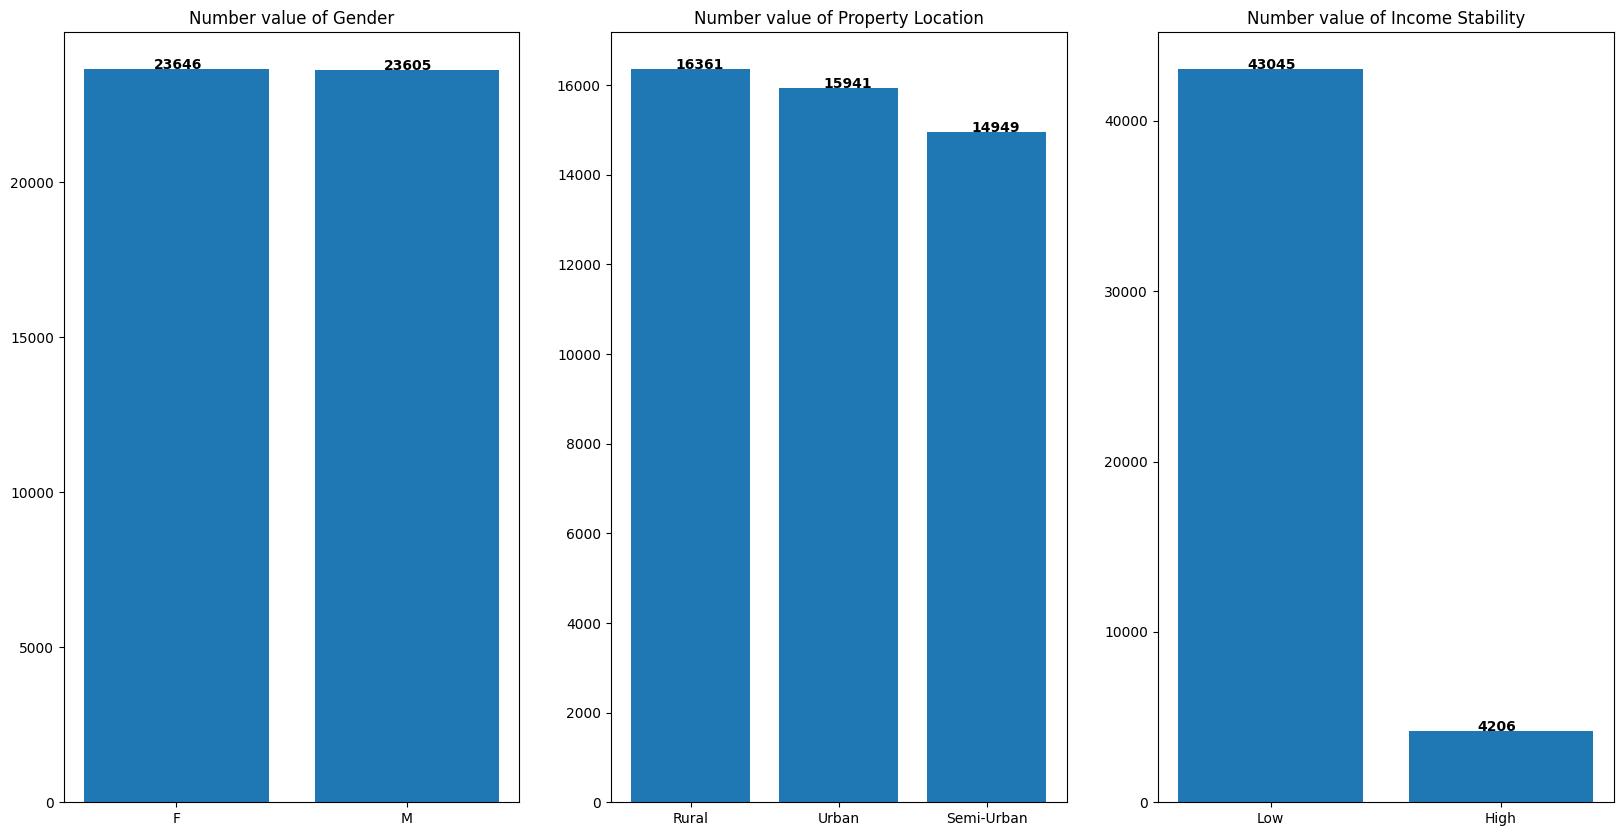

In [12]:
_, ax = plt.subplots(1, 3, figsize=(20, 10))
for i,col in enumerate(['Gender', 'Property Location', 'Income Stability']):
    names = df[col].unique()
    ax[i].bar(names,df[col].value_counts())
    ax[i].set_title('Number value of {}'.format(col))
    for j in ax[i].patches:
        ax[i].text(j.get_x()+0.3, j.get_height()+1, str(round((j.get_height()), 2)),fontweight='bold', fontsize=10, color='black')

**Nhận xét**:
* Income Stability có sự chênh lệch lớn giữa giá trị Low: 43045 và High 4206

### Biều đồ phân tán dữ liệu

In [13]:
# Biểu đồ phân tán theo từng cặp đặc trưng trong dữ liệu 
def scatter_plot(x = 'Income (USD)', y= 'Property Price', z = 'Income Stability'):
    """Vẽ biểu đồ phân tán với cặp đặc trưng khác nhau
    """
    if x == y:
        raise ValueError("Can't draw the same features together")
    plt.figure(figsize=(13,10))
    sns.scatterplot(x=df[x], y=df[y], hue=df[z], linewidth=0.1)
    plt.title('Scatter Plot 2D')

widgets.interact(scatter_plot, x = df.columns[:-1], 
                                y = df.columns[:-1], 
                                z = ['Income Stability','Gender', 'Property Location'])
plt.show()

interactive(children=(Dropdown(description='x', index=2, options=('Gender', 'Age', 'Income (USD)', 'Income Sta…

**Nhận xét**:
* Dữ liệu được thu thập cho người có thu nhập thấp nhiều hơn người có thu nhập cao

### Vẽ biều đồ boxplot và detect outlier

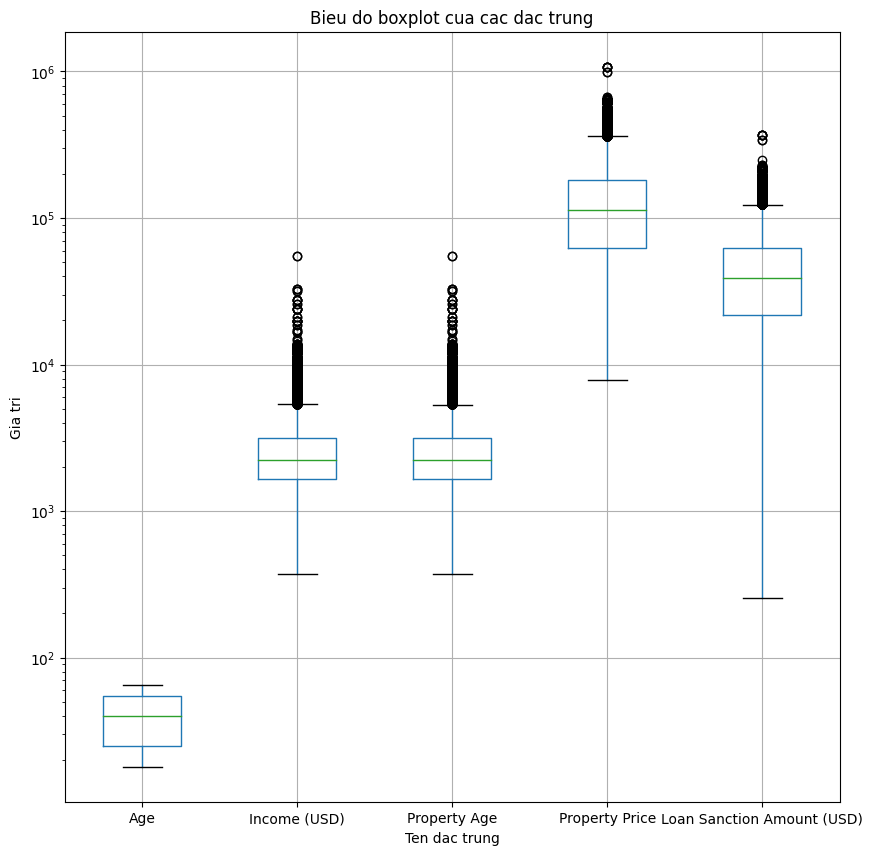

In [14]:
# Boxplot check outlier
df.drop(['Gender', 'Property Location'], axis = 1).boxplot(figsize=(10,10))
plt.title('Bieu do boxplot cua cac dac trung')
plt.xlabel('Ten dac trung')
plt.ylabel('Gia tri')
plt.yscale('log')

**Nhận xét:**
* Trên hình thì 3 đặc trưng Income, Property Age và Property Price có nhiều outlier ở 1 phía, sẽ được xử lí sau
* Income và Property Age như trên hình có cùng dạng boxplot, dự đoán chúng có tương quan cao với nhau

### Biều đồ heatmap để kiểm tra tương quan giữa các đặc trưng

[Text(0.5, 1.0, 'Correlation Matrix')]

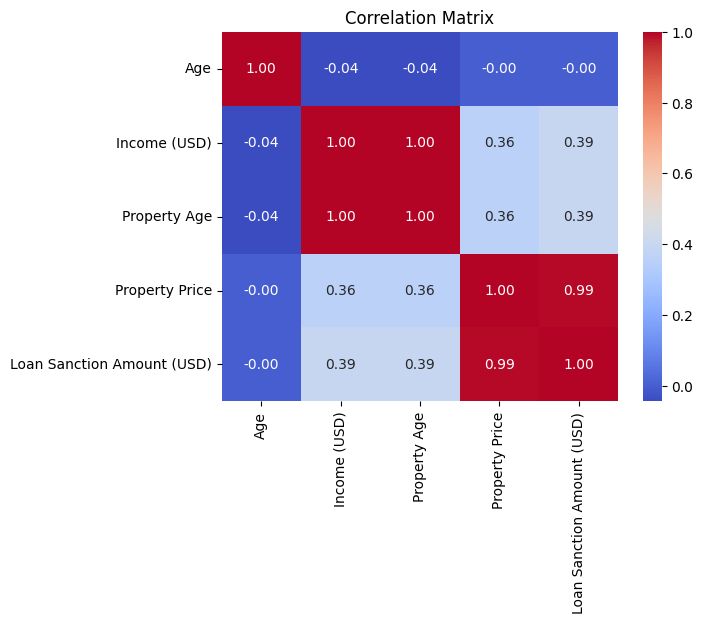

In [15]:
# Independent each feature
import seaborn as sns

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm').set(title='Correlation Matrix')

In [16]:
df.corr()['Loan Sanction Amount (USD)'].sort_values(ascending=False)

Loan Sanction Amount (USD)    1.000000
Property Price                0.994429
Income (USD)                  0.392897
Property Age                  0.392892
Age                          -0.000115
Name: Loan Sanction Amount (USD), dtype: float64

**Nhận xét:**
* Cặp feature có tương quan cao: Income và Property Price như đã nhận xét ở trên
* Age không ảnh hưởng đến target Loan Sanction Amount với tương quan: -0.000319

In [17]:
# Lower các đặc trưng có kiểu string trong dataframe
def lower_string_series(df: pd.DataFrame):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.lower()
    return df

# Chuẩn hóa dữ liệu string về dạng categorical
def normalize_data(df):
    normalize_data = df.copy() # Todo: normalize data into numerical data
    normalize_data = lower_string_series(normalize_data)
    normalize_data['Gender'] = normalize_data['Gender'].apply(lambda x: 1 if x == 'm' else 0).astype('category').cat.codes
    normalize_data['Income Stability'] = normalize_data['Income Stability'].apply(lambda x: 1 if x == 'high' else 0).astype('category').cat.codes
    normalize_data['Property Location'] = normalize_data['Property Location'].apply(lambda x: 0 if x == 'rural' else 
                                                                                              1 if x == 'urban' else 2).astype('category').cat.codes
    return normalize_data

[Text(0.5, 1.0, 'Correlation Matrix')]

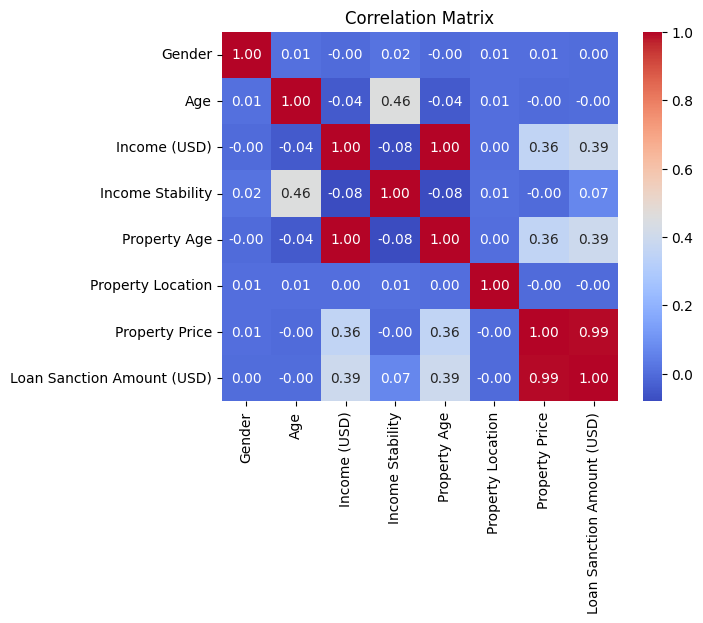

In [18]:
# Biểu đồ Heatmap sau khi chuẩn hóa dữ liệu
import seaborn as sns

df_new = normalize_data(df.copy())
sns.heatmap(df_new.corr(), annot=True, fmt='.2f', cmap='coolwarm').set(title='Correlation Matrix') # Show heatmap after normalized data


In [19]:
df_new.corr()['Loan Sanction Amount (USD)'].sort_values(ascending=False)

Loan Sanction Amount (USD)    1.000000
Property Price                0.994429
Income (USD)                  0.392897
Property Age                  0.392892
Income Stability              0.070969
Gender                        0.003396
Age                          -0.000115
Property Location            -0.003714
Name: Loan Sanction Amount (USD), dtype: float64

**Nhân xét:**
* Đặc trưng không ảnh hưởng đến quá trình dữ đoán là Agesẽ bỏ đi
* Đặc trưng mới được xử lí là Gender và Property Location có hệ số tương quan hơi thấp, nhưng ta sẽ giữ lại để xem kết quả

### Thực hiện xóa các đặc trưng không có ý nghĩa giải thích hoặc phụ thuộc vào đăc trưng khác

In [20]:
df_new = df_new.drop(['Property Age'], axis = 1)

# Apply machine learning model

## Train-test split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [22]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    X = df.iloc[:,:-1]# Todo: Select features
    y = df.iloc[:,-1]# Todo: Select label
    return X, y

X, y = prepare_X_y(df_new)
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)

Shape of X:  (47251, 6)
Shape of y:  (47251,)


In [23]:
def split_train_test(X, y, train_size=0.7):
    # Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=42)
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [24]:
TRAIN_SIZE = 0.7
VALID_SIZE = 0.4
trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)
validX, testX ,validY, testY = split_train_test(testX, testY, train_size=VALID_SIZE)

Training:(33075, 6)
Test:(14176, 6)
Training:(5670, 6)
Test:(8506, 6)


## Basic Linear Regression

* Ở bước này ta chỉ áp dụng các model ở mức cơ bản với tham số mặc định mà không fine-tune các tham số để so sánh kết quả với phương pháp fine-tune

In [25]:
from sklearn.linear_model import LinearRegression
import time

def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True, n_jobs=-1)# Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model
start_time = time.time()
model = build_linear_model(trainX, trainY)
print(f'Time for training: {time.time() - start_time:4f}s ')
# Compare on training dataset
pred_train = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY) )
pred_valid = model.predict(validX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred_valid, y_true=validY) )

print(f' Weight of each attribute in data: {np.array(model.coef_, dtype = np.float16)}\n') # print coefficient

print(f'Intercept in linear model {model.intercept_}') # print intercept_


Time for training: 0.008020s 
mean absolute error of linear model on train set  122.2353252337419
mean absolute error of linear model on test set  139.93530203777132
 Weight of each attribute in data: [-2.369e+02 -7.950e+01  1.027e+00  1.116e+04 -1.396e+02  3.362e-01]

Intercept in linear model 839.3349461756152


In [26]:
from sklearn.linear_model import Lasso


def build_lasso_model(X, y):
    model = Lasso(fit_intercept=True,
                  alpha=1,
                  precompute=True, # Gram matrix is X.T * X is stored in memory for faster computation of each iteration
                  max_iter=1000,
                  tol=1e-4, # If Cost < 1e-4 then stop
                  random_state=42,
                  selection="cyclic")# Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model
start_time = time.time()
model = build_lasso_model(trainX, trainY)
print(f'Time for training: {time.time() - start_time:4f}s ')
# Compare on training dataset
pred_train = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY) )
pred_valid = model.predict(validX) 
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred_valid, y_true=validY) )

print(f' Weight of each attribute in data: {np.array(model.coef_, dtype = np.float16)}\n') # print coefficient

print(f'Intercept in linear model {model.intercept_}') # print intercept_


Time for training: 0.002811s 
mean absolute error of linear model on train set  123.47040342228509
mean absolute error of linear model on test set  141.1389834370339
 Weight of each attribute in data: [-2.3262e+02 -7.9375e+01  1.0273e+00  1.1144e+04 -1.3812e+02  3.3618e-01]

Intercept in linear model 832.352762001552


In [27]:
from sklearn.linear_model import Ridge


def build_ridge_model(X, y):
    model = Ridge(alpha = 1,
                  fit_intercept=True,
                  max_iter=None,
                  tol=1e-4,
                  solver='auto',
                  random_state=42)# Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model
start_time = time.time()
model = build_ridge_model(trainX, trainY)
print(f'Time for training: {time.time() - start_time:4f}s ')

# Compare on training dataset
pred_train = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY) )
pred_valid = model.predict(validX) 
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred_valid, y_true=validY) )

print(f' Weight of each attribute in data: {np.array(model.coef_, dtype = np.float16)}\n') # print coefficient

print(f'Intercept in linear model {model.intercept_}') # print intercept_


Time for training: 0.006017s 
mean absolute error of linear model on train set  122.61763109949082
mean absolute error of linear model on test set  140.3196614918557
 Weight of each attribute in data: [-2.368e+02 -7.944e+01  1.027e+00  1.115e+04 -1.395e+02  3.362e-01]

Intercept in linear model 838.1738991787352


In [28]:
from sklearn.linear_model import ElasticNet


def build_elastic_model(X, y):
    model = ElasticNet(alpha=1,
                       l1_ratio=0.5,
                       fit_intercept=True,
                       max_iter=1000,
                       tol=1e-4,
                       random_state=42,
                       precompute=True,
                       selection='cyclic')# Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model
start_time = time.time()
model = build_elastic_model(trainX, trainY)
print(f'Time for training: {time.time() - start_time:4f}s ')
# Compare on training dataset
pred_train = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY) )
pred_valid = model.predict(validX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred_valid, y_true=validY) )

print(f' Weight of each attribute in data: {np.array(model.coef_, dtype = np.float16)}\n') # print coefficient

print(f'Intercept in linear model {model.intercept_}') # print intercept_


Time for training: 0.004627s 
mean absolute error of linear model on train set  1749.5088048084572
mean absolute error of linear model on test set  1751.6040457040922
 Weight of each attribute in data: [-4.041e+01 -1.239e-01  9.136e-01  1.268e+03 -7.706e+01  3.369e-01]

Intercept in linear model -1403.168298278928


## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [29]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(degree=2,
                                                  include_bias=False),
                               LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)  

    return poly_model
# Compare on training dataset
start_time = time.time()
poly_model = build_pipeline(trainX, trainY)
print(f'Time for training: {time.time() - start_time:4f}s ')
poly_pred_train = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred_train, y_true=trainY) )

poly_pred_valid = poly_model.predict(validX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred_valid, y_true=validY))

Time for training: 0.028969s 
mean absolute error of linear model (with poly transform) on train set  124.84409005488803
mean absolute error of linear model (with poly transform) on test set  142.83570847385226


So sánh kết quả:
|Model|Valid Error|Time Complexity|
|----|----|----|
|LR|139.9353|0.008152s |
|Lasso|141.1389|0.003324s|
|Ridge|140.3196|0.004311s|
|ElasticNet|1751.60|0.003932s|
|Polynomial|142.8357|0.034606s|

**Nhận xét**: 
* Từ kết quả trên ta thấy model Linear Regression cho kết quả tốt nhất với thời gian chậm nhất nhưng vẫn chấp nhận được
* Nếu để chọn model cho hiệu năng tốt hơn mà dự đoán tương đương ta chọn model Ridge

## Fine-tune model

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import RobustScaler, StandardScaler

class FineTuneModel:
    def __init__(self, name) -> None:
        self.model = {
            'lr' : LinearRegression(),
            'lasso': Lasso(),
            'ridge' : Ridge(),
            'enet' : ElasticNet(),
            'poly_lr': Pipeline(steps = [
                ('preprocessor',PolynomialFeatures()),
                ('estimator', LinearRegression())
            ]),
            'poly_ridge': Pipeline(steps = [
                ('preprocessor',PolynomialFeatures()),
                ('estimator', Ridge())
            ])
        }
        
        self.params = {
            'lr' : {
                'fit_intercept' : [True],
                'n_jobs': [-1]  
            },
            'lasso': [
                {
                    'alpha': np.array([0.001,0.01, 0.1, 1, 10]),
                    'precompute': [True],
                    'max_iter': np.array([1000, 5000, 10000,15000]),
                    'tol': np.array([1e-5, 1e-4, 1e-3]),
                    'selection': ['cyclic']
                },
                {
                    'alpha': np.array([0.001,0.01, 0.1, 1, 10]),
                    'precompute': [True],
                    'max_iter': np.array([1000, 5000, 10000,15000]),
                    'tol': np.array([1e-3, 1e-2, 1e-1]),
                    'selection': ['random'],
                    'random_state': [42]
                }
            ],
            'ridge' : [
                {
                    'alpha': np.array([0.001,0.01, 0.1, 1, 10]),
                    'fit_intercept': [True],
                    'tol': np.array([1e-5, 1e-4, 1e-3]),
                    'solver': ['auto', 'sag', 'saga', 'lbfgs'],
                    'max_iter': np.array([1000, 10000, 15000, 20000, 25000]),
                    'random_state': [42]
                },
                {
                    'alpha': np.array([0.001,0.01, 0.1, 1, 10]),
                    'fit_intercept': [True],
                    'solver': ['svd', 'cholesky']
                },
                {
                    'alpha': np.array([0.001,0.01, 0.1, 1, 10]),
                    'fit_intercept': [True],
                    'tol': np.array([1e-5, 1e-4, 1e-3]),
                    'solver': ['sparse_cg', 'lsqr'] 
                }
            ],
            'enet' : [
                {
                    'alpha': np.array([0.001,0.01, 0.1, 1, 10]),
                    'l1_ratio': np.arange(0.01, 1, 0.1),
                    'precompute': [True],
                    'max_iter': np.array([1000, 5000, 10000,15000]),
                    'tol': np.array([1e-5, 1e-4, 1e-3]),
                    'selection': ['cyclic']
                },
                {
                    'alpha': np.array([0.001,0.01, 0.1, 1, 10]),
                    'l1_ratio': np.arange(0.01, 1, 0.1),
                    'precompute': [True],
                    'max_iter': np.array([1000, 5000, 10000,15000]),
                    'tol': np.array([1e-3, 1e-2, 1e-1]),
                    'selection': ['random'],
                    'random_state': [42]
                }
            ],
            'poly_lr': {
                'preprocessor__degree': np.arange(2, 4, 1),
                'preprocessor__include_bias': [False],
                'preprocessor__order': ['C', 'F'],
            },
            'poly_ridge': [
                    {
                        'preprocessor__degree': np.arange(2, 4, 1),
                        'preprocessor__include_bias': [False],
                        'preprocessor__order': ['C', 'F'],
                        'estimator__alpha': np.array([0.001,0.01, 0.1, 1, 10]),
                        'estimator__fit_intercept': [True],
                        'estimator__tol': np.array([1e-5, 1e-4, 1e-3]),
                        'estimator__solver': ['auto', 'sag', 'saga', 'lbfgs'],
                        'estimator__max_iter': np.array([1000, 10000, 15000, 20000, 25000]),
                        'estimator__random_state': [42]
                    },
                    {
                        'preprocessor__degree': np.arange(2, 4, 1),
                        'preprocessor__include_bias': [False],
                        'preprocessor__order': ['C', 'F'],
                        'estimator__alpha': np.array([0.001,0.01, 0.1, 1, 10]),
                        'estimator__fit_intercept': [True],
                        'estimator__solver': ['svd', 'cholesky']
                    },
                    {
                        'preprocessor__degree': np.arange(2, 4, 1),
                        'preprocessor__include_bias': [False],
                        'preprocessor__order': ['C', 'F'],
                        'estimator__alpha': np.array([0.001,0.01, 0.1, 1, 10]),
                        'estimator__fit_intercept': [True],
                        'estimator__tol': np.array([1e-5, 1e-4, 1e-3]),
                        'estimator__solver': ['sparse_cg', 'lsqr'] 
                    }
                ],
        }
        self.grid = None
        self.name = name

    def fit(self, X, y):
        pipeline_gdsearch = Pipeline(
            steps=[
                ('scaler', StandardScaler()),
                ('estimator', self.model[self.name])
            ]
        )
        if isinstance(self.params[self.name], list):
            params_grid = []
            for dic in self.params[self.name]:
                param = {}
                for key, value in dic.items():
                    param['estimator__%s' % key] = value
                params_grid.append(param)
        else:
            params_grid = {}
            for param, value in self.params[self.name].items():
                params_grid['estimator__%s' % param] = value
        scorer = make_scorer(mean_absolute_error)
        self.grid = RandomizedSearchCV(pipeline_gdsearch, params_grid, cv=5, 
                                 scoring=scorer, 
                                 n_jobs=-1, return_train_score=True)
        self.grid.fit(X, y)
    
    def stat_compare_hyperparams(self):
        if self.grid is None:
            raise ValueError("You must fit the model first")
        results_df = pd.DataFrame(self.grid.cv_results_)
        results_df = results_df.sort_values(by=['rank_test_score'])
        results_df = results_df.set_index(
            results_df['params'].apply(lambda x: ', '.join(
                str(value) for value in x.values()
            )).rename_axis(', '.join(str(key).replace('estimator__', '') for key in results_df.loc[0, 'params']))
        )
        return results_df[['rank_test_score', 'mean_test_score', 'std_test_score']]
    
    def mae_score(self, X, y):
        return self.grid.score(X, y)

In [71]:
models = ['lr', 'lasso', 'ridge', 'enet', 'poly_lr', 'poly_ridge']
results = {}

for model in models:
    results[model] = FineTuneModel(model)
    results[model].fit(trainX, trainY)

/home/kisejin/anaconda3/envs/py11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kisejin/anaconda3/envs/py11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kisejin/anaconda3/envs/py11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kisejin/anaconda3/envs/py11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kisejin/anaconda3/envs/py11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [72]:
import pickle
import os 
os.chdir('/home/kisejin/Documents/MATH/Machine Learning/CODE/Tuan01')
def save_model(array_model, tail_file='.pkl'):
    if not os.path.exists('checkpoint'):
        os.makedirs('checkpoint')
    for result in results.items():
        with open('checkpoint/' + result[0] + tail_file, 'wb') as f:
            pickle.dump(result[1].grid, f)

def load_model(models, tail_file='.pkl'):
    files = [model + tail_file for model in models]
    list_model = {}
    for file in files:
        list_model[file.split('.')[0]] = pickle.load(open('checkpoint/' + file, 'rb'))
    return list_model

save_model(results)
lst = load_model(models)

In [73]:
score = []
testsetX = pd.concat([validX, testX])
testsetY = pd.concat([validY, testY])
for model in models:
    score.append(results[model].mae_score(validX, validY))

df = pd.DataFrame({"Score":score}, index=models)
df

,Score
lr,139.935302
lasso,2233.355085
ridge,141.824797
enet,9980.104140
poly_lr,146.626212
poly_ridge,22333.799800


In [74]:
for model in models: 
    display(results[model].grid.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', LinearRegression(n_jobs=-1))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 Lasso(alpha=0.001, max_iter=10000, precompute=True,
                       random_state=42, selection='random', tol=0.1))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 Ridge(alpha=0.1, max_iter=15000, random_state=42,
                       solver='saga', tol=0.001))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 ElasticNet(l1_ratio=0.31000000000000005, max_iter=10000,
                            precompute=True))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 Pipeline(steps=[('preprocessor',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False,
                                                     order='F')),
                                 ('estimator', LinearRegression())]))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 Pipeline(steps=[('preprocessor',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False)),
                                 ('estimator',
                                  Ridge(max_iter=10000, random_state=42,
                                        solver='saga', tol=0.001))]))])